In [ ]:
!pip install sktime

In [ ]:
import sktime
sktime.__version__

In [2]:
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
import matplotlib.pyplot as plt
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/monthly-milk-production-pounds-p.csv",index_col=0)
df.head()

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727


In [4]:
idx = pd.to_datetime( df.index ).to_period("M")
df.index = idx

In [ ]:
type(idx)

In [ ]:
df.head()

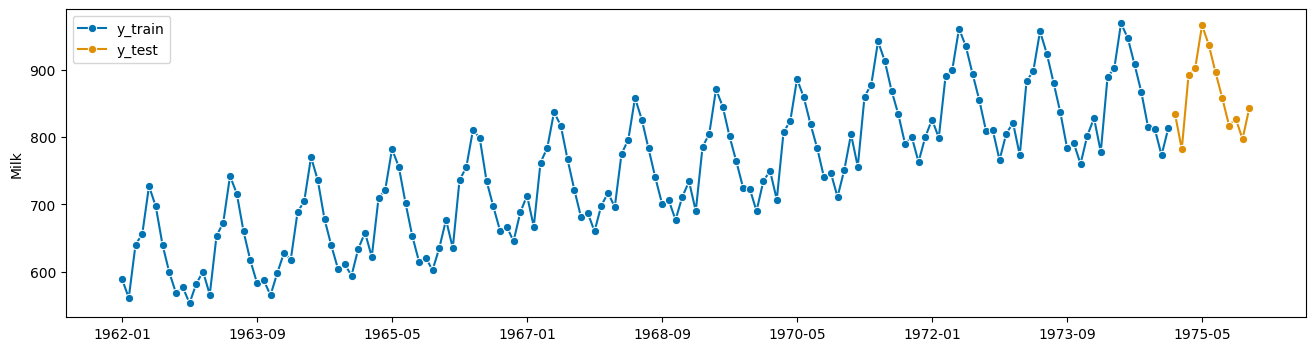

In [7]:
y = df['Milk']
y_train, y_test = temporal_train_test_split(y, test_size=12)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
#print(y_train.shape[0], y_test.shape[0])
plt.show()

Specifying the Forecasting Horizon

In [8]:
fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['1975-01', '1975-02', '1975-03', '1975-04', '1975-05', '1975-06',
             '1975-07', '1975-08', '1975-09', '1975-10', '1975-11', '1975-12'],
            dtype='period[M]', is_relative=False)

**Exponential Smoothing**

In [ ]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=True))


**ETS fitting**

Simple Exponential Smoothing

In [ ]:
forecaster = AutoETS(auto=False, sp=12,error='add',trend=None,seasonal=None)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

Auto-Tuned

144.16552521409312


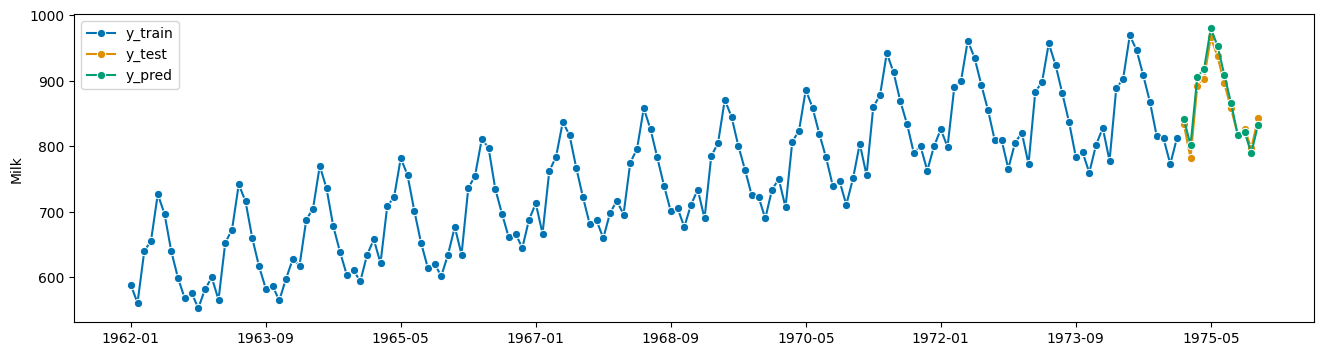

In [20]:
forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

In [ ]:
print(forecaster.summary())

## Auto ARIMA

In [ ]:
!pip install sktime[all_extras]

In [ ]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12, d=0, max_p=3, max_q=3, suppress_warnings=True, trace=True)
forecaster.fit(y_train)

In [ ]:
print(forecaster.summary())

13.941138744115277


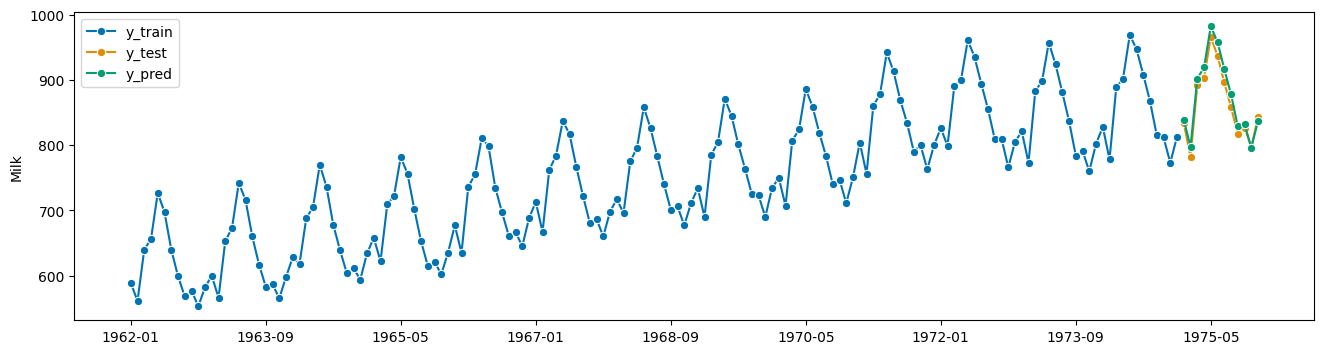

In [11]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))